In [231]:
from bs4 import BeautifulSoup as bs
import requests
import re
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_soup(url):
    
    main_html = requests.get(url)
    
    soup = bs(main_html.content, 'html.parser')
    
    return soup

In [3]:
def compute_pages(soup):
    
    try:
        items = int(re.search('\d+\s+of\s+(\d+)',soup.find_all(class_='listing-results-utils-count')[0].text).groups()[0])

        pages = math.ceil(items/40)
    
    except:
        
        return None
    
    return pages

In [4]:
def get_page_postcodes(url, page):
    
    url = url + '&pn={page}'.format(page=page)
    
    soup = get_soup(url)
    
    postcodes = [postcodes.get_text().strip(' ,') for postcodes in soup.find_all(class_='sold-prices-street-postcode')]

    return postcodes   

In [5]:
def get_inner_postcodes():
    
    base_url = 'https://www.zoopla.co.uk/house-prices/browse/london/nw6/kilburn-queens-park-south-and-west-hampstead-brondesbury-park/?q=london%20nw6'
        
    n_pages = compute_pages(get_soup(base_url))
            
    postcodes = []
    
    for page in range(n_pages+1):
        
        postcodes += get_page_postcodes(url=base_url, page=page)
    
    return set(postcodes)

In [6]:
def extract_properties_from_postcode(postcode):
    
    postcode = postcode.replace(' ', '-')
    
    base_url = 'https://www.zoopla.co.uk/house-prices/london/'
    url = 'https://www.zoopla.co.uk/house-prices/london/{pc}/?pn={page}'.format(pc=postcode, page=1)
    soup = get_soup(url)
    
    n_pages = compute_pages(soup)
    
    if not n_pages:
        return None
    
    results = []
    
    for page in range(1, n_pages+1):
            
        url = 'https://www.zoopla.co.uk/house-prices/london/{pc}/?pn={page}'.format(pc=postcode, page=page)
        soup = get_soup(url)
        propierties = soup.find_all('tr', class_=re.compile('row-(even|odd)'))
            
        for i, row in enumerate(propierties[1:]):

            try:
                
                result = {x:y for x,y in zip(('address', 'date', 'price', 'attributes'), extract_sales_by_row(row))}
                result['postcode'] = postcode    
                
                results.append(result)

            except:
                
                return row
        
    
    return results

In [7]:
def extract_old_prices(panels):
    
    data = panels[0].text.split('\n\n\n')
    
    prices = [data[date].strip() for date in range(0, len(data),2)]
    dates = [data[price].strip() for price in range(1, len(data),2)]
    
    return prices, dates

In [8]:
def extract_sales_by_row(row):

    house = row.findChild(class_='browse-cell-address')
    sales = row.findChild(class_='browse-cell-date')
    attributes = row.findChild(class_='attributes').get_text().strip()

    address = house.findChild(class_='sold-prices-results-address')
    date = sales.findChild(class_='sold-prices-data')
    price = sales.findChild(class_='sold-prices-data-price')
    old_price = sales.findChildren(class_='previous-sales-panel')
    
    if address:
        address = address.get_text().strip().split('\n')[0]
    else:
        address = None
        
    if date:
        date = [date.get_text().strip()]
    else:
        date = None
        
    if price:
        price = [price.get_text().strip()]
    else:
        price = None
    
    if old_price:
        dates, prices = extract_old_prices(old_price)
        prices = price + prices
        dates = date + dates
    else:
        prices = price
        dates = date
        
        
    return address, dates, prices, attributes

In [9]:
pc = get_inner_postcodes()

In [10]:
total = []

In [12]:
for i, postcode in enumerate(pc):
    print(i, postcode)
    total.append(extract_properties_from_postcode(postcode))

0 NW6 4DN
1 NW6 5PD
2 NW6 2HB
3 NW6 7YF
4 NW6 7BA
5 NW6 6SP
6 NW6 1TT
7 NW6 6EN
8 NW6 3LW
9 NW6 5BX
10 NW6 5HE
11 NW6 1QT
12 NW6 4RX
13 NW6 7RN
14 NW6 3JH
15 NW6 6PS
16 NW6 7DN
17 NW6 5LS
18 NW6 7DZ
19 NW6 1NF
20 NW6 6BA
21 NW6 6TD
22 NW6 2BH
23 NW6 7AL
24 NW6 4TA
25 NW6 1XT
26 NW6 3ET
27 NW6 4RH
28 NW6 3QA
29 NW6 4BR
30 NW6 3RP
31 NW6 3RX
32 NW6 2DX
33 NW6 7TY
34 NW6 5JJ
35 NW6 6DG
36 NW6 2PS
37 NW6 1DU
38 NW6 7ER
39 NW6 4QZ
40 NW6 6LR
41 NW6 7SE
42 NW6 1XF
43 NW6 3QR
44 NW6 2DY
45 NW6 7BU
46 NW6 7LG
47 NW6 5HL
48 NW6 4HY
49 NW6 6BJ
50 NW6 6JH
51 NW6 2PX
52 NW6 7JN
53 NW6 4DF
54 NW6 7XJ
55 NW6 7RD
56 NW6 5LF
57 NW6 6PY
58 NW6 6QH
59 NW6 4DL
60 NW6 6SG
61 NW6 5FT
62 NW6 5EG
63 NW6 5UG
64 NW6 3NH
65 NW6 4SG
66 NW6 3PH
67 NW6 7DL
68 NW6 6AU
69 NW6 1UA
70 NW6 1QW
71 NW6 5HU
72 NW6 4DT
73 NW6 1HF
74 NW6 5TR
75 NW6 6PD
76 NW6 5AT
77 NW6 1LR
78 NW6 4QL
79 NW6 7QJ
80 NW6 7EA
81 NW6 1PS
82 NW6 7XU
83 NW6 2PY
84 NW6 4EQ
85 NW6 6EG
86 NW6 5BW
87 NW6 7YE
88 NW6 5UZ
89 NW6 5FH
90 NW6 3NU
91 NW6 4T

692 NW6 5RE
693 NW6 4RS
694 NW6 1EE
695 NW6 4AU
696 NW6 3AH
697 NW6 7PB
698 NW6 6SY
699 NW6 4DJ
700 NW6 4PG
701 NW6 6RN
702 NW6 7NR
703 NW6 1LN
704 NW6 7DR
705 NW6 3AL
706 NW6 3JL
707 NW6 6BF
708 NW6 6DE
709 NW6 5JE
710 NW6 1QG
711 NW6 4JH
712 NW6 5JP
713 NW6 6NL
714 NW6 3LB
715 NW6 3QN
716 NW6 3JN
717 NW6 2BT
718 NW6 6LA
719 NW6 5BT
720 NW6 1PN
721 NW6 3QG
722 NW6 1QR
723 NW6 5ER
724 NW6 7GZ
725 NW6 2LS
726 NW6 6DX
727 NW6 6JL
728 NW6 1PU
729 NW6 1HT
730 NW6 3BP
731 NW6 7AT
732 NW6 3EE
733 NW6 1TN
734 NW6 3HS
735 NW6 1QE
736 NW6 1PR
737 NW6 3LS
738 NW6 2PD
739 NW6 4NE
740 NW6 6PP
741 NW6 1UE
742 NW6 7PD
743 NW6 7HH
744 NW6 3HB
745 NW6 2AF
746 NW6 2BE
747 NW6 7SD
748 NW6 3RG
749 NW6 1TH
750 NW6 1DJ
751 NW6 2AP
752 NW6 5QS
753 NW6 1RL
754 NW6 4SN
755 NW6 5QT
756 NW6 6JE
757 NW6 7RJ
758 NW6 5JB
759 NW6 1HS
760 NW6 3AP
761 NW6 6BB
762 NW6 7PY
763 NW6 1TJ
764 NW6 7FB
765 NW6 7PJ
766 NW6 3RQ
767 NW6 5LB
768 NW6 7BY
769 NW6 6AA
770 NW6 4QU
771 NW6 4PT
772 NW6 1EH
773 NW6 6AE
774 NW6 7XR
775 

In [370]:
df = pd.concat([pd.DataFrame(x) for x in total])
df = df.dropna()

In [371]:
df.head()

,address,date,price,attributes,postcode
1,"Flat 3, Snowman House, Abbey Road","[Nov 2016, Feb 2008]","[£327,500, £228,950]","Flat, Leasehold, 2 Beds, 1 Bath, 1 Recep",NW6-4DN
5,"Flat 7, Snowman House, Abbey Road",[Sep 2013],"[£260,000]","Flat, Leasehold",NW6-4DN
7,"Flat 9, Snowman House, Abbey Road",[Dec 2007],"[£229,950]","Flat, Leasehold, 1 Bed, 1 Bath, 1 Recep",NW6-4DN
13,"Flat 15, Snowman House, Abbey Road",[May 2003],"[£51,000]","Flat, Leasehold",NW6-4DN
31,"Flat 33, Snowman House, Abbey Road",[Mar 2003],"[£56,500]","Flat, Leasehold, 2 Beds, 1 Bath, 1 Recep",NW6-4DN


---------

In [372]:
def extract_beds(x):
    txt = x['attributes']
    match = re.search('(\d+)\s*Beds?', txt, re.IGNORECASE)
    if match:
        return match.groups()[0]
    else:
        return None

In [373]:
def merge_price_date(x):
    price_date = []
    for price, date in zip(x['price'], x['date']):
        price_date.append(price+'_'+date)
    return price_date

In [374]:
df['beds'] = df.apply(extract_beds, axis=1)
df = df.dropna()
df['price_date'] = df.apply(merge_price_date, axis = 1) # This is done so it is easier to "melt" the df with the columns at the same time
df = df.drop(['price', 'date'], axis = 1)
df = df.reset_index(drop=True)

In [375]:
df

,address,attributes,postcode,beds,price_date
0,"Flat 3, Snowman House, Abbey Road","Flat, Leasehold, 2 Beds, 1 Bath, 1 Recep",NW6-4DN,2,"[£327,500_Nov 2016, £228,950_Feb 2008]"
1,"Flat 9, Snowman House, Abbey Road","Flat, Leasehold, 1 Bed, 1 Bath, 1 Recep",NW6-4DN,1,"[£229,950_Dec 2007]"
2,"Flat 33, Snowman House, Abbey Road","Flat, Leasehold, 2 Beds, 1 Bath, 1 Recep",NW6-4DN,2,"[£56,500_Mar 2003]"
3,"Flat 35, Snowman House, Abbey Road","Flat, Leasehold, 2 Beds, 1 Bath, 1 Recep",NW6-4DN,2,"[£175,000_Oct 2012]"
4,"Flat 36, Snowman House, Abbey Road","Flat, Leasehold, 2 Beds, 1 Bath, 1 Recep",NW6-4DN,2,"[£235,000_Aug 2013]"
...,...,...,...,...,...
8627,85 Brassey Road,"Flat, Leasehold, 0 Beds, 1 Bath, 1 Recep",NW6-2BB,0,"[£175,000_Oct 2015, £172,000_Sep 2014, £97,594..."
8628,91 Brassey Road,"Flat, Leasehold, 0 Beds, 1 Bath, 1 Recep",NW6-2BB,0,"[£190,000_Jan 2013]"
8629,104 Brassey Road,"Flat, Leasehold, 1 Bed, 1 Bath",NW6-2BB,1,"[£169,000_Mar 2006, £106,000_Feb 2005]"
8630,113 Brassey Road,"Flat, Leasehold, 1 Bed, 1 Bath, 1 Recep",NW6-2BB,1,"[£372,500_Dec 2018, £210,000_Oct 2011]"


In [376]:
df = df.explode('price_date')

In [377]:
df[['price','date']] = df['price_date'].str.split('_', expand=True) 

In [378]:
df = df.drop('price_date', axis=1)

In [379]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['price'] = df['price'].str.replace('[£,]', '',regex=True).astype(int)

In [380]:
df

,address,attributes,postcode,beds,price,date,year
0,"Flat 3, Snowman House, Abbey Road","Flat, Leasehold, 2 Beds, 1 Bath, 1 Recep",NW6-4DN,2,327500,2016-11-01,2016
0,"Flat 3, Snowman House, Abbey Road","Flat, Leasehold, 2 Beds, 1 Bath, 1 Recep",NW6-4DN,2,228950,2008-02-01,2008
1,"Flat 9, Snowman House, Abbey Road","Flat, Leasehold, 1 Bed, 1 Bath, 1 Recep",NW6-4DN,1,229950,2007-12-01,2007
2,"Flat 33, Snowman House, Abbey Road","Flat, Leasehold, 2 Beds, 1 Bath, 1 Recep",NW6-4DN,2,56500,2003-03-01,2003
3,"Flat 35, Snowman House, Abbey Road","Flat, Leasehold, 2 Beds, 1 Bath, 1 Recep",NW6-4DN,2,175000,2012-10-01,2012
...,...,...,...,...,...,...,...
8629,104 Brassey Road,"Flat, Leasehold, 1 Bed, 1 Bath",NW6-2BB,1,106000,2005-02-01,2005
8630,113 Brassey Road,"Flat, Leasehold, 1 Bed, 1 Bath, 1 Recep",NW6-2BB,1,372500,2018-12-01,2018
8630,113 Brassey Road,"Flat, Leasehold, 1 Bed, 1 Bath, 1 Recep",NW6-2BB,1,210000,2011-10-01,2011
8631,116 Brassey Road,"Flat, Leasehold, 1 Bed, 1 Bath, 1 Recep",NW6-2BB,1,260000,2012-10-01,2012


In [381]:
df.to_csv('nw6_data.csv')

----------

In [382]:
def compute_repeat_sales_index():
    
    a=%system Rscript repeat_sales.R
    
    data = pd.read_csv('.rsi_index_per_bed.csv')

    data = data.rename(columns={'Unnamed: 0':'Time'})

    data = data.bfill()

    data = data.replace('NONE', np.nan).dropna(axis=1)
    
    data.to_csv('rsi_index_per_bed.csv')
    
    data = data.iloc[1:]
    
    return data

In [396]:
valid_propierties = df['address'].sort_values().unique()[df.groupby('address')['date'].size()>1]

vdf = df[df['address'].isin(valid_propierties)]

vdf['beds'] = vdf['beds'].astype(int)
vdf['date'] = pd.to_datetime(vdf['date'])
vdf['year'] = vdf['date'].dt.year

/home/angel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/angel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/angel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:

In [397]:
vdf

,address,attributes,postcode,beds,price,date,year
0,"Flat 3, Snowman House, Abbey Road","Flat, Leasehold, 2 Beds, 1 Bath, 1 Recep",NW6-4DN,2,327500,2016-11-01,2016
0,"Flat 3, Snowman House, Abbey Road","Flat, Leasehold, 2 Beds, 1 Bath, 1 Recep",NW6-4DN,2,228950,2008-02-01,2008
1,"Flat 9, Snowman House, Abbey Road","Flat, Leasehold, 1 Bed, 1 Bath, 1 Recep",NW6-4DN,1,229950,2007-12-01,2007
2,"Flat 33, Snowman House, Abbey Road","Flat, Leasehold, 2 Beds, 1 Bath, 1 Recep",NW6-4DN,2,56500,2003-03-01,2003
3,"Flat 35, Snowman House, Abbey Road","Flat, Leasehold, 2 Beds, 1 Bath, 1 Recep",NW6-4DN,2,175000,2012-10-01,2012
...,...,...,...,...,...,...,...
8629,104 Brassey Road,"Flat, Leasehold, 1 Bed, 1 Bath",NW6-2BB,1,106000,2005-02-01,2005
8630,113 Brassey Road,"Flat, Leasehold, 1 Bed, 1 Bath, 1 Recep",NW6-2BB,1,372500,2018-12-01,2018
8630,113 Brassey Road,"Flat, Leasehold, 1 Bed, 1 Bath, 1 Recep",NW6-2BB,1,210000,2011-10-01,2011
8631,116 Brassey Road,"Flat, Leasehold, 1 Bed, 1 Bath, 1 Recep",NW6-2BB,1,260000,2012-10-01,2012


In [398]:
rsi = compute_repeat_sales_index()

In [399]:
rsi

,Time,1,2,3,4,5,6,7,8
1,Time 2,-0.156121,0.092738,0.099105,0.162428,0.151102,-0.087517,0.052606,-0.382736
2,Time 3,-0.091296,0.221577,0.248182,0.296599,0.291395,0.160542,0.142506,0.217545
3,Time 4,0.305455,0.402096,0.472843,0.455148,0.461020,0.059074,0.215449,0.793745
4,Time 5,0.466702,0.593241,0.604715,0.617440,0.670638,0.386263,0.535295,0.743638
5,Time 6,0.652954,0.825051,0.815563,0.828743,0.913063,0.687918,0.190545,0.912875
6,Time 7,0.761020,0.891511,0.916395,0.927518,0.945316,0.846633,0.387508,1.169720
7,Time 8,1.082268,1.068569,1.049306,1.060102,1.119620,0.989409,1.038592,0.996213
8,Time 9,1.129123,1.145665,1.121487,1.097581,1.155159,0.992599,1.113613,1.165413
9,Time 10,0.942007,1.241312,1.158724,1.144167,1.271029,1.154703,1.201334,1.098834
10,Time 11,1.336896,1.212743,1.177614,1.190694,1.232750,0.990044,1.212569,1.104928


---

### Rental Prices

rental price groth in London is 1.3: https://advantage.zpg.co.uk/wp-content/uploads/2019/10/Rental-Market-Report-%E2%80%94-Q3-2019.pdf

rental price by bedroom: https://www.zoopla.co.uk/market/london/nw6/kilburn-queens-park-south-and-west-hampstead-brondesbury-park/

In [326]:
rent_data = pd.read_excel('voa-average-rent-borough.xls', sheet_name='Raw data', \
                          skiprows=2, \
                          usecols=['Year', 'Area', 'Category', 'Count of rents', 'Average'])

In [327]:
rent_data.head()

,Year,Area,Category,Count of rents,Average
0,2011,City of London,Room,-,-
1,2011,Barking and Dagenham,Room,92,336
2,2011,Barnet,Room,945,450
3,2011,Bexley,Room,119,390
4,2011,Brent,Room,344,469


In [333]:
# We filter the data by target region. As the data is not postcode-precise, 
# the most accurate region would be NW (nortwest)
rent_data = rent_data[rent_data['Area'] == 'NORTH WEST'].drop('Area', 1)

In [334]:
rent_data['Category'].unique()

array(['Studio', 'One Bedroom', 'Two Bedroom', 'Three Bedroom',
       'Four or more Bedrooms'], dtype=object)

In [335]:
# We filter by properties having a specific number of rooms
rent_data = rent_data[~rent_data['Category'].isin(['Room', 'All categories'])]

In [339]:

beds_dict = {
    'Studio':0,
    'One Bedroom':1,
    'Two Bedroom':2,
    'Three Bedroom':3,
    'Four or more Bedrooms':4,
}

rent_data['beds'] = rent_data['Category'].apply(lambda x: beds_dict[x])

In [349]:
rent_data[['Count of rents', 'Average']] = rent_data[['Count of rents', 'Average']].astype(int)

In [359]:
rent_data = rent_data.groupby(['Year', 'beds'])['Count of rents', 'Average'].mean().reset_index()

### Renting forecast

In [527]:
from statsmodels.tsa.arima_model import ARMA

In [530]:
rent_data_0 = rent_data[rent_data['beds'] ==0]

In [529]:
ARMA?

In [533]:
ARMA(endog=rent_data_0['rent'], dates=rent_data_0['year'])

TypeError: __init__() missing 1 required positional argument: 'order'

---- 

### Merging renting and selling

In [440]:
sell_data = vdf.drop(['attributes', 'postcode'], axis = 1)

In [441]:
# The current renting data is segmented by beds until 3 and then is 4 or more. 
# We need to adjust the selling data for that
sell_data.loc[sell_data['beds']>=4,'beds'] = 4

In [442]:
#sell_data = sell_data.groupby(['beds','year'])['price'].mean().reset_index()

In [444]:
rent_data = rent_data.drop('Count of rents', 1, errors='ignore').rename(columns={'Year':'year', 'Average':'rent'})

In [445]:
full_data = rent_data.merge(sell_data)

In [451]:
full_data['yield'] = full_data['rent']*12/full_data['price']

### Exploring the rent and sell data

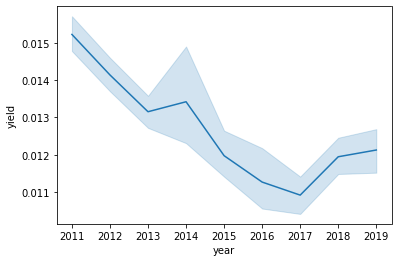

In [452]:
sns.lineplot(y='yield', x='year', data=full_data)

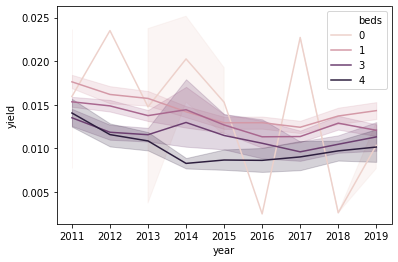

In [453]:
sns.lineplot(y='yield', x='year', data=full_data, hue='beds')

We can see something's wierd with the 0-bed segment. 

In [507]:
full_data.groupby('beds')['price'].agg(['mean', 'std', 'size']).astype(int)

,mean,std,size
beds,,,
0,533555,597762,39
1,414238,234847,1038
2,552880,241546,2081
3,819631,414720,929
4,1486533,796755,764


It has a huge std compared to the mean. That's because we they have a very sparese price range and very few sample size. The most reasonable action is to discard them. 

In [650]:
full_data_no_studio = full_data.loc[full_data['beds']!=0,:]

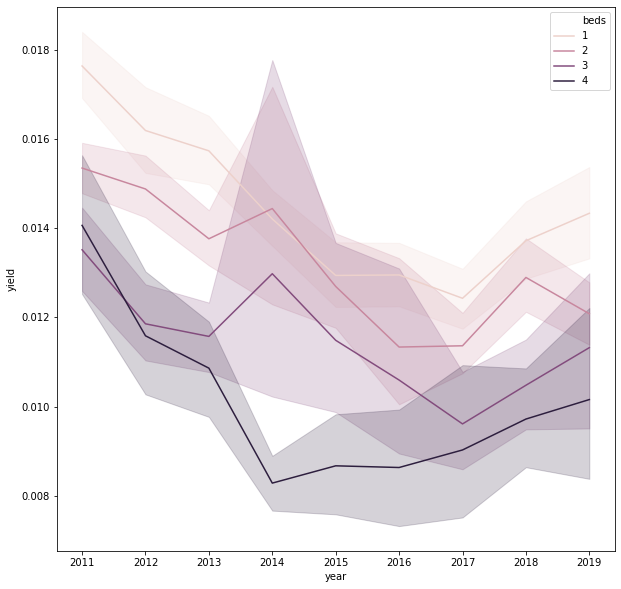

In [515]:
plt.figure(figsize=(10,10))
sns.lineplot(y='yield', x='year', data=full_data_no_studio, hue='beds')
plt.show()

We can see some of the trends loom to sharp and unnatural. We will sarch for outliers.

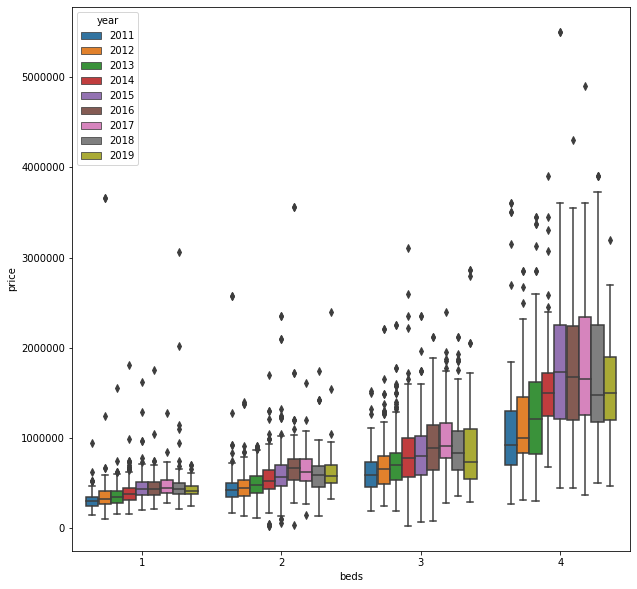

In [560]:
plt.figure(figsize=(10,10))
sns.boxplot(data=full_data_no_studio, y = 'price', x='beds', hue='year')

It can be seen that there are some heavy outliers.

In [666]:
outs = full_data_no_studio.groupby(["beds","year"])["price"].quantile([0.25, 0.75]).unstack(level=2).reset_index()

In [667]:
tmp_data = full_data_no_studio.merge(on=['year', 'beds'], right=outs)

In [668]:
tmp_data['IQR'] = tmp_data[0.75] - tmp_data[0.25]

In [669]:
full_data_no_studio_no = tmp_data[~(tmp_data['price'] < tmp_data[0.25] - tmp_data['IQR']*1.5) | (tmp_data['price'] > tmp_data[0.75] + tmp_data['IQR']*1.5)].drop(['IQR', 0.25, 0.75], axis=1)

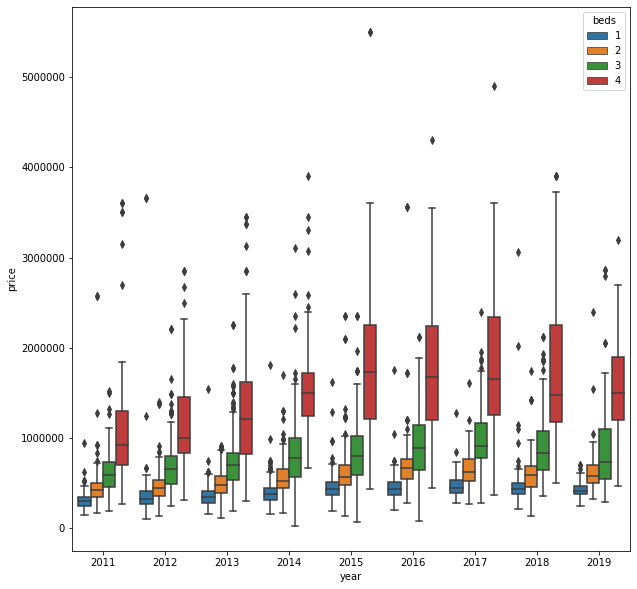

In [670]:
plt.figure(figsize=(10,10))
sns.boxplot(data=full_data_no_studio_no, y = 'price', x='year', hue='beds')

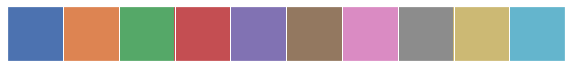

In [676]:
import seaborn as sns; sns.set()
sns.palplot(sns.color_palette())

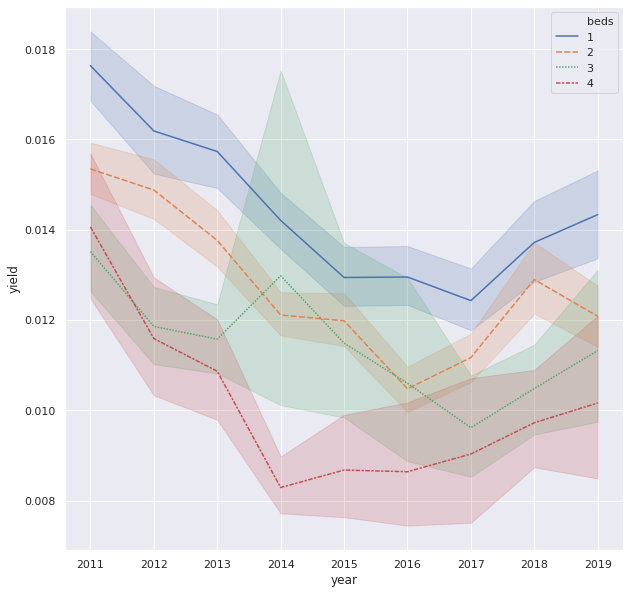

In [680]:
plt.figure(figsize=(10,10))
sns.lineplot(y='yield', x='year', data=full_data_no_studio_no, hue='beds', style='beds', palette=sns.color_palette()[0:4])
plt.show()

The green spike (2013, 3 beds) it mainly due to some very unrealistic prices (see table below). They do not fall mathematically into an outlier but they are clearly wrong.

In [700]:
full_data_no_studio_no[(full_data_no_studio_no['beds']==3)&(full_data_no_studio_no['year']==2014)].sort_values(by='price')

,year,beds,rent,address,price,date,yield
2619,2014,3,614.0,70 Compayne Gardens,26501,2014-11-01,0.278027
2658,2014,3,614.0,"Flat, 278 Kilburn High Road",155000,2014-11-01,0.047535
2636,2014,3,614.0,59a Mill Lane,260000,2014-01-01,0.028338
2602,2014,3,614.0,"Flat 4, Varley House, 21 Brondesbury Road",295000,2014-10-01,0.024976
2578,2014,3,614.0,2 Clement Close,299950,2014-02-01,0.024564
...,...,...,...,...,...,...,...
2677,2014,3,614.0,32 Windermere Avenue,1720000,2014-05-01,0.004284
2630,2014,3,614.0,69 Keslake Road,2225000,2014-07-01,0.003311
2637,2014,3,614.0,5a Greville Place,2350000,2014-05-01,0.003135
2647,2014,3,614.0,16 Sherriff Road,2600000,2014-06-01,0.002834


(0, 0.06)

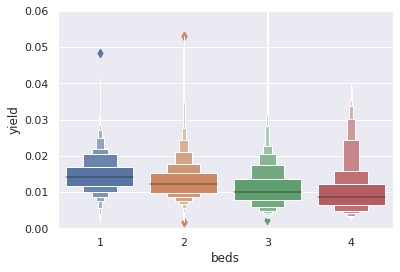

In [717]:
ax = sns.boxenplot(data=full_data_no_studio_no, x='beds', y='yield')
ax.set_ylim([0, 0.06])

beds
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
Name: yield, dtype: object

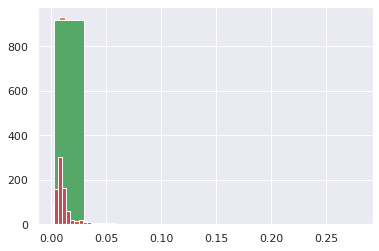

In [709]:
full_data_no_studio_no.groupby( 'beds')['yield'].